In [116]:
import numpy as np
import matplotlib.pyplot as plt 

In [117]:
n = 100
A = np.random.randn(n, n)
A = A.T @ A

In [118]:
np.linalg.cond(A), min(np.linalg.eigvalsh(A))

(227198.9447666083, 0.0016413987779758555)

In [119]:
b =  np.random.randn(n)

In [120]:
def f(x):
  return 0.5 * x @ A @ x - b @ x

def grad(x):
  return A @ x - b

In [121]:
def heavy_ball(grad, alpha, beta, x0, num_iter, tol):
  conv = [x0.copy()]
  x = x0.copy()
  for k in range(num_iter):
    g = grad(x)
    if np.linalg.norm(g) < tol:
      break
    if k == 0:
      x = x - alpha * g
    else:
      x = x - alpha * g + beta * (x - conv[-2])

    conv.append(x.copy())
  return x, conv

def fgm(grad, alpha, x0, num_iter, tol):
  conv = [x0.copy()]
  x = x0.copy()
  v = x0.copy()
  theta = 1.
  for k in range(num_iter):
    y = (1 - theta) * x + theta * v
    g = grad(y)
    x = y - alpha * g
    v = conv[-1] + 1 / theta * (x - conv[-1])
    conv.append(x.copy())
    theta = 2 / (k+2)
    # theta = 0.5 * (np.sqrt(theta**2 + 4) - 1)
    # print(theta)
  return x, conv

In [122]:
x0 =  np.random.randn(n)
num_iter = 10000
tol=1e-5
beta = 0.9
alpha = 1e-3

In [123]:
x_hb, conv_hb = heavy_ball(grad, alpha, beta, x0, num_iter, tol)
x_fgm, conv_fgm = fgm(grad, alpha, x0, num_iter, tol)

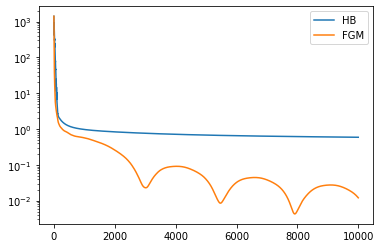

In [124]:
plt.plot([np.linalg.norm(grad(x)) for x in conv_hb], label="HB")
plt.plot([np.linalg.norm(grad(x)) for x in conv_fgm], label="FGM")
plt.yscale("log")
plt.legend()

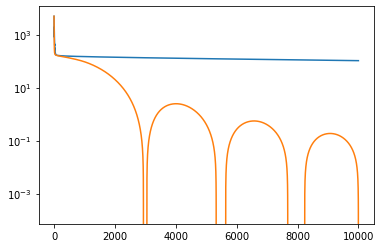

In [125]:
plt.plot([f(x) - f(x_fgm) for x in conv_hb])
plt.plot([f(x) - f(x_fgm) for x in conv_fgm])
plt.yscale("log")